In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

c:\users\mayan\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.optimizers import Adam

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

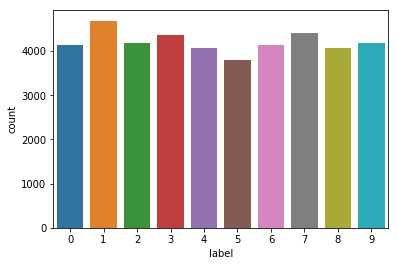

In [6]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
del train
g = sns.countplot(Y_train)
Y_train.value_counts()

In [7]:
print ("shape of X_train") 
print(X_train.shape)
print ("shape of X_test") 
print(Y_train.shape)
print ("shape of test") 
print(test.shape)

shape of X_train
(42000, 784)
shape of X_test
(42000,)
shape of test
(28000, 784)


In [8]:
#normalizing the data
X_train = X_train / 255.0
test = test / 255.0

<h1> Reshaping of the data</h1>

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

<h2> One hot encoding </h2>

In [10]:
Y_train = to_categorical(Y_train, num_classes = 10)

<h1> Dividing into train & set </h1>

In [11]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed )

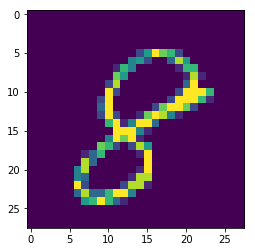

In [12]:
g = plt.imshow(X_train[0][:,:,0])

<h1> CNN MODEL </h1>

In [5]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Valid', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-3), metrics=["accuracy"])
annealer = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

epochs = 50
batch_size = 64

# learning rate 

we will be reducing learning rate as we proceed & observe that we are not obtaining a significant decrease in loss function


In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# DATA AUGMENTATION 
creating more data from the existing data using various data augmentation techniques so as to help our model train better. 

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


In [19]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/50
 - 201s - loss: 0.3824 - acc: 0.8760 - val_loss: 0.0786 - val_acc: 0.9757
Epoch 2/50
 - 201s - loss: 0.1290 - acc: 0.9603 - val_loss: 0.0376 - val_acc: 0.9890
Epoch 3/50
 - 201s - loss: 0.0994 - acc: 0.9696 - val_loss: 0.0367 - val_acc: 0.9910
Epoch 4/50
 - 312s - loss: 0.0871 - acc: 0.9745 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 5/50
 - 313s - loss: 0.0767 - acc: 0.9772 - val_loss: 0.0302 - val_acc: 0.9917
Epoch 6/50
 - 310s - loss: 0.0688 - acc: 0.9781 - val_loss: 0.0301 - val_acc: 0.9910
Epoch 7/50
 - 262s - loss: 0.0614 - acc: 0.9814 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 8/50
 - 196s - loss: 0.0591 - acc: 0.9821 - val_loss: 0.0208 - val_acc: 0.9931
Epoch 9/50
 - 208s - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0211 - val_acc: 0.9943
Epoch 10/50
 - 207s - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0228 - val_acc: 0.9940
Epoch 11/50
 - 207s - loss: 0.0529 - acc: 0.9838 - val_loss: 0.0158 - val_acc: 0.9960
Epoch 12/50
 - 206s - loss: 0.0508 - acc: 0.9851 - val_loss: 0.

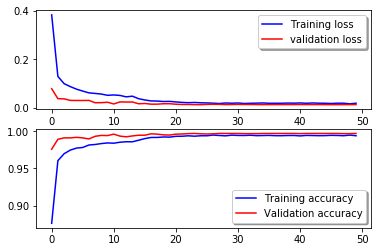

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:

results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [22]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("sub2.csv",index=False)